<a href="https://colab.research.google.com/github/Philocreation/Practice_Preprocessing/blob/main/flawed_iris_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
! wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv

--2021-11-30 09:29:32--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2782 (2.7K) [text/plain]
Saving to: ‘flawed_iris.csv.7’

flawed_iris.csv.7   100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-11-30 09:29:32 (37.7 MB/s) - ‘flawed_iris.csv.7’ saved [2782/2782]



In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
df = pd.read_csv("flawed_iris.csv")
print(df)

     septal_length septal_width  petal_length  petal_width   color  class
0              6.4          2.8           5.6          2.2   light    2.0
1              5.0          2.3           3.3          1.0  medium    1.0
2              4.9          2.5           4.5          1.7  medium    2.0
3              4.9          3.1           1.5          0.1    dark    0.0
4              5.7          3.8           1.7          0.3    dark    0.0
..             ...          ...           ...          ...     ...    ...
115            5.5          2.6           4.4          1.2   light    1.0
116            5.7            3           NaN          1.2   light    1.0
117            4.4          2.9           1.4          0.2   light    0.0
118            4.8            3           1.4          0.1    dark    0.0
119            5.5          2.4           3.7         -1.0    dark    1.0

[120 rows x 6 columns]


In [354]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    object 
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.8+ KB
None


In [355]:
df.septal_width = df.septal_width.astype(float)

ValueError: ignored

In [360]:
print(df[df.septal_width=="2..3"])

    septal_length septal_width  petal_length  ...  color class  color_code
79            6.4         2..3           1.9  ...    NaN   NaN          -1

[1 rows x 7 columns]


In [361]:
df.loc[df.septal_width=="2..3", "septal_width"] = "2.3"

In [362]:
df.septal_width = df.septal_width.astype(float)

In [363]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   septal_length  117 non-null    float64 
 1   septal_width   118 non-null    float64 
 2   petal_length   117 non-null    float64 
 3   petal_width    118 non-null    float64 
 4   color          117 non-null    category
 5   class          119 non-null    float64 
 6   color_code     120 non-null    int8    
dtypes: category(1), float64(5), int8(1)
memory usage: 5.1 KB
None


In [364]:
df.color.value_counts()

dark      46
medium    38
light     33
Name: color, dtype: int64

In [365]:
df.color = df.color.astype('category')

In [366]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   septal_length  117 non-null    float64 
 1   septal_width   118 non-null    float64 
 2   petal_length   117 non-null    float64 
 3   petal_width    118 non-null    float64 
 4   color          117 non-null    category
 5   class          119 non-null    float64 
 6   color_code     120 non-null    int8    
dtypes: category(1), float64(5), int8(1)
memory usage: 5.1 KB
None


In [367]:
df['color_code'] = df.color.cat.codes


In [368]:
print(df.color_code)

0      1
1      2
2      2
3      0
4      0
      ..
115    1
116    1
117    1
118    0
119    0
Name: color_code, Length: 120, dtype: int8


# 이상치 처리

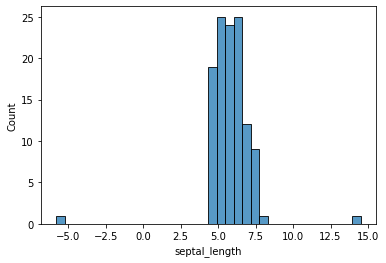

In [369]:
sns.histplot(df.septal_length)

In [370]:
print(df.loc[df.septal_length<2.5, "septal_length"])
print(df.loc[df.septal_length>10.0, "septal_length"])

41   -5.8
Name: septal_length, dtype: float64
90    14.5
Name: septal_length, dtype: float64


In [371]:
filtered = df.loc[(df.septal_length>=2.5) & (df.septal_length<=10.0),"septal_length"]
min = filtered.min()
max = filtered.max()

print("min = ", min)
print("max = ", max)

min =  4.4
max =  7.9


In [372]:
df.loc[df.septal_length <2.5, "septal_length"] = min
df.loc[df.septal_length >10.0, "septal_length"] = max

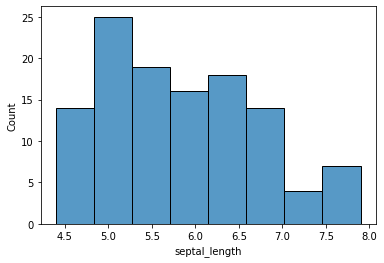

In [373]:
sns.histplot(df.septal_length)

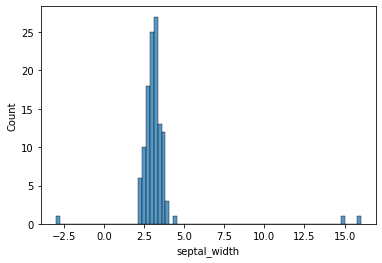

In [374]:
sns.histplot(df.septal_width)

In [375]:
print(df.loc[df.septal_width <0.0, "septal_width"])
print(df.loc[df.septal_width >5.0, "septal_width"])

55   -3.0
Name: septal_width, dtype: float64
59    16.0
74    15.0
Name: septal_width, dtype: float64


In [376]:
change = df.loc[(df.septal_width >0.0) & (df.septal_width<5.0), "septal_width"]
min = change.min()
max = change.max() 

print("min = ", min)
print("max = ", max)

min =  2.2
max =  4.4


In [377]:
df.loc[df.septal_width <0.0, "septal_width"] = min
df.loc[df.septal_width >10.0, "septal_width"] = max 

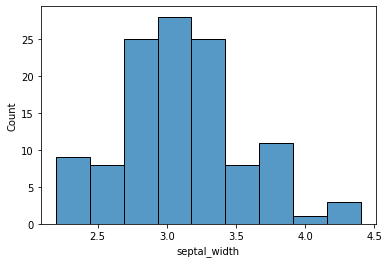

In [378]:
sns.histplot(df.septal_width)

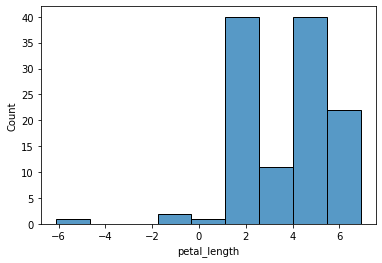

In [379]:
sns.histplot(df.petal_length)

In [380]:
print(df.loc[df.petal_length>-2, "petal_length"].mean())
a = df.loc[df.petal_length>-2, "petal_length"].mean()
b = round(a,1)
print(b)

3.6060344827586213
3.6


In [381]:
df.loc[df.petal_length<0, 'petal_length'] = b

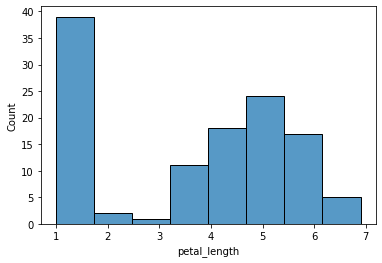

In [382]:
sns.histplot(df.petal_length)

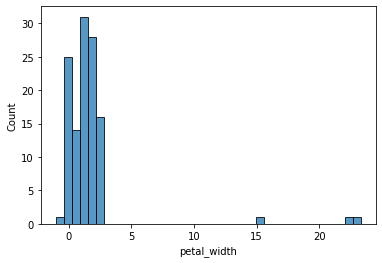

In [383]:
sns.histplot(df.petal_width)

1.1973913043478257


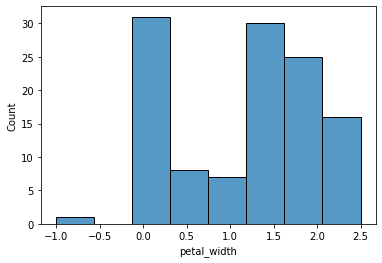

In [384]:
print(df.loc[df.petal_width<5, "petal_width"].mean())
a = df.loc[df.petal_width<5, "petal_width"].mean() 
df.loc[df.petal_width>5, "petal_width"] = a 
sns.histplot(df.petal_width)

0.1


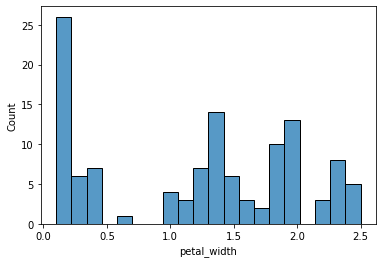

In [385]:
print(df.loc[df.petal_width>0, "petal_width"].min())
a = df.loc[df.petal_width>0, "petal_width"].min()
df.loc[df.petal_width<0, "petal_width"] = a 
sns.histplot(df.petal_width, bins=20) 

# 결측치 처리

In [386]:
print(df.isnull().sum())

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            3
class            1
color_code       0
dtype: int64


In [387]:
df.loc[df['class'].isnull()]

,septal_length,septal_width,petal_length,petal_width,color,class,color_code
79,6.4,2.3,1.9,2.0,NaN,NaN,-1


In [388]:
working_df = df.loc[~df['class'].isnull()]

In [390]:
print(working_df.isnull().sum())
print(working_df.info())

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            2
class            0
color_code       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   septal_length  116 non-null    float64 
 1   septal_width   117 non-null    float64 
 2   petal_length   116 non-null    float64 
 3   petal_width    117 non-null    float64 
 4   color          117 non-null    category
 5   class          119 non-null    float64 
 6   color_code     119 non-null    int8    
dtypes: category(1), float64(5), int8(1)
memory usage: 5.9 KB
None


In [396]:
working_df = working_df.fillna(df.mean())

In [397]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   septal_length  119 non-null    float64 
 1   septal_width   119 non-null    float64 
 2   petal_length   119 non-null    float64 
 3   petal_width    119 non-null    float64 
 4   color          117 non-null    category
 5   class          119 non-null    float64 
 6   color_code     119 non-null    int8    
dtypes: category(1), float64(5), int8(1)
memory usage: 5.9 KB


In [398]:
working_df.isnull().any()

septal_length    False
septal_width     False
petal_length     False
petal_width      False
color             True
class            False
color_code       False
dtype: bool

In [401]:
working_df.drop('color', axis='columns', inplace=True)

KeyError: ignored

In [403]:
working_df.isnull().any().any()

False

# Normalization

In [405]:
normalized_df = (working_df - wording_df.min()) / (wording_df.max()-working_df.min())

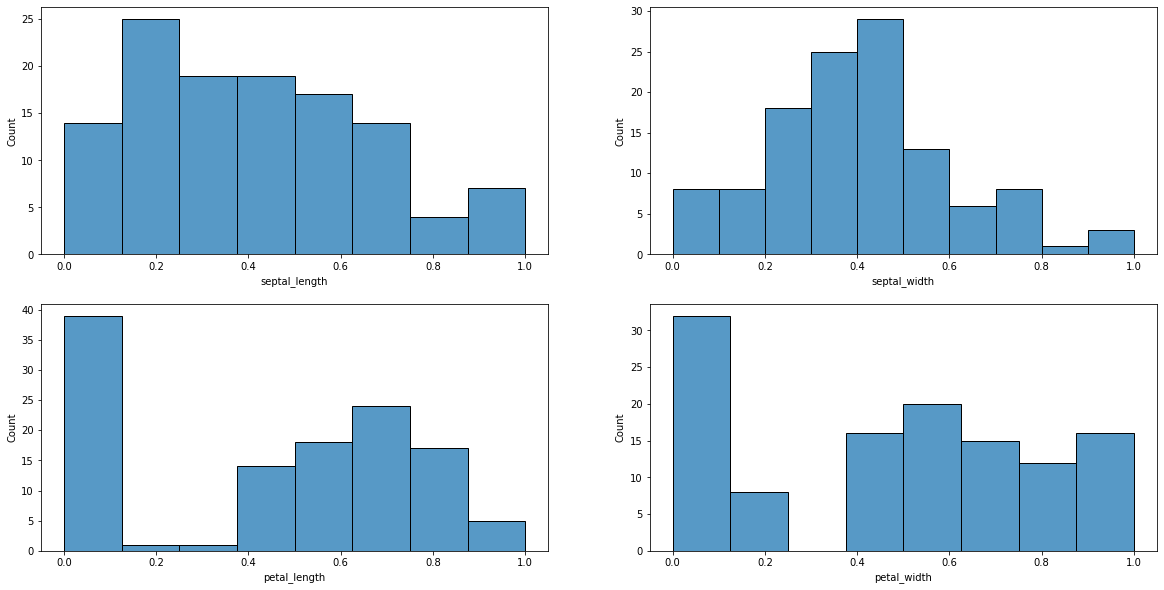

In [415]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.histplot(normalized_df.septal_length)

plt.subplot(222)
sns.histplot(normalized_df.septal_width)

plt.subplot(223)
sns.histplot(normalized_df.petal_length)

plt.subplot(224)
sns.histplot(normalized_df.petal_width)


In [417]:
normalized_df

,septal_length,septal_width,petal_length,petal_width,class,color_code
0,0.571429,0.272727,0.779661,0.875000,1.0,0.666667
1,0.171429,0.045455,0.389831,0.375000,0.5,1.000000
2,0.142857,0.136364,0.593220,0.666667,1.0,1.000000
3,0.142857,0.409091,0.084746,0.000000,0.0,0.333333
4,0.371429,0.727273,0.118644,0.083333,0.0,0.333333
...,...,...,...,...,...,...
115,0.314286,0.181818,0.576271,0.458333,0.5,0.666667
116,0.371429,0.363636,0.456034,0.458333,0.5,0.666667
117,0.000000,0.318182,0.067797,0.041667,0.0,0.666667
118,0.114286,0.363636,0.067797,0.000000,0.0,0.333333


In [418]:
target_column_names = ["septal_length", "septal_width", "petal_length", "petal_width"]
working_df[target_column_names] = normalized_df[target_column_names]

In [421]:
working_df

,septal_length,septal_width,petal_length,petal_width,class,color_code
0,0.571429,0.272727,0.779661,0.875000,2.0,1
1,0.171429,0.045455,0.389831,0.375000,1.0,2
2,0.142857,0.136364,0.593220,0.666667,2.0,2
3,0.142857,0.409091,0.084746,0.000000,0.0,0
4,0.371429,0.727273,0.118644,0.083333,0.0,0
...,...,...,...,...,...,...
115,0.314286,0.181818,0.576271,0.458333,1.0,1
116,0.371429,0.363636,0.456034,0.458333,1.0,1
117,0.000000,0.318182,0.067797,0.041667,0.0,1
118,0.114286,0.363636,0.067797,0.000000,0.0,0
